In [1]:
%matplotlib inline

import numpy as np
import pylab as plt
import tensorflow as tf

def data(n):
    x = []
    for i in range(n):
        x.append(np.random.normal(0,1,(10,15)))
    return np.expand_dims(np.array(x),axis=-1)

def truth(x):
    y = np.zeros(x.shape)
    n = x.shape[0]
    for i in range(n):
        y[i] = x[i]/x[i].max()
        y[i][y[i]<0]=0
    return y

(3, 10, 15, 1)


Text(0.5,1,'Output')

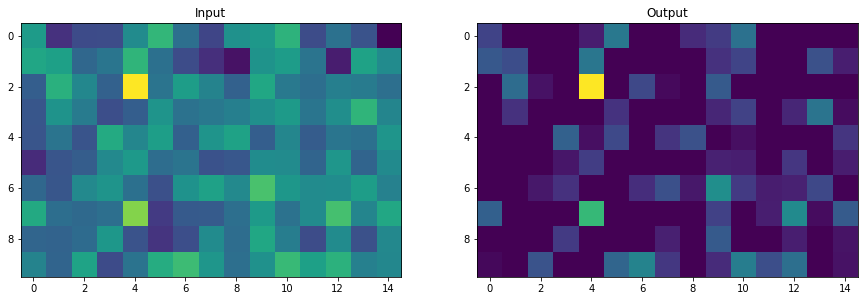

In [2]:
fig,(ax1,ax2) = plt.subplots(ncols=2,nrows=1,figsize=(15,7))

x = data(3)
print(x.shape)
y = truth(x)
    
ax1.imshow(x[0,:,:,0])
ax1.set_title('Input')
ax2.imshow(y[0,:,:,0])
ax2.set_title('Output')

In [4]:
nx,ny,n_channel = 10,15,1

x_in = tf.placeholder(tf.float32,[None,nx,ny,n_channel])
y_true = tf.placeholder(tf.float32,[None,nx,ny,1])
learning_rate = tf.placeholder(tf.float32)
drop_out = tf.placeholder(tf.float32)

x = tf.layers.conv2d(x_in,filters=16,kernel_size=5,strides=(1, 1),padding='same',
        activation=tf.nn.relu)
x = tf.layers.conv2d(x,filters=16,kernel_size=5,strides=(1, 1),padding='same',
        activation=tf.nn.relu)

x = tf.layers.dropout(x, drop_out)
x_out = tf.layers.conv2d(x,filters=1,kernel_size=5,strides=(1, 1),padding='same',
        activation=tf.nn.relu)

cost = tf.reduce_sum(tf.pow(y_true - x_out, 2))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

sess = tf.InteractiveSession()
init = tf.global_variables_initializer()
sess.run(init)

In [7]:
for i in range(100):
    x = data(100)
    y = truth(x)
    _, c = sess.run([optimizer, cost], feed_dict=
                     {x_in: x, y_true: y, drop_out: 0.7, learning_rate: 0.01})
    if i%10==0:
        print(c)

44.5561
40.1778
39.4344
34.8651
37.2216
35.3479
40.2249
27.6727
33.7001
30.9735


Text(0.5,1,'Prediction')

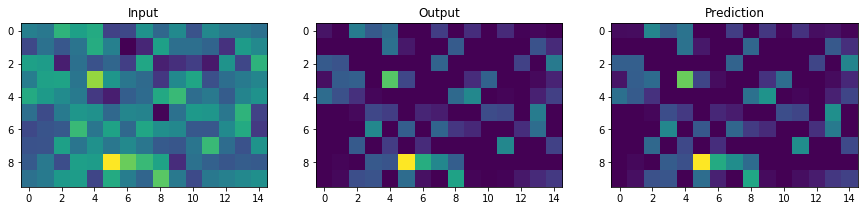

In [8]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,nrows=1,figsize=(15,7))

x = data(1)
y = truth(x)

x_pred = sess.run(x_out, feed_dict={x_in:x})
    
ax1.imshow(x[0,:,:,0])
ax1.set_title('Input')
ax2.imshow(y[0,:,:,0])
ax2.set_title('Output')
ax3.imshow(x_pred[0,:,:,0])
ax3.set_title('Prediction')